# Precision-Recall-Gain Curves: PR Analysis Done Right

### Peter A. Flach and Meelis Kull, Intelligent Systems Laboratory, University of Bristol

___Abstract:___
_Precision-Recall analysis abounds in applications of binary classification where true negatives do not add value and hence should not affect assessment of the classifier's performance. Perhaps inspired by the many advantages of receiver operating characteristic (ROC) curves and the area under such curves for accuracy-based performance assessment, many researchers have taken to report Precision-Recall (PR) curves and associated areas as performance metric. We demonstrate in this paper that this practice is fraught with difficulties, mainly because of incoherent scale assumptions -- e.g., the area under a PR curve takes the arithmetic mean of precision values whereas the Fβ score applies the harmonic mean. We show how to fix this by plotting PR curves in a different coordinate system, and demonstrate that the new Precision-Recall-Gain curves inherit all key advantages of ROC curves. In particular, the area under Precision-Recall-Gain curves conveys an expected F1 score on a harmonic scale, and the convex hull of a Precision-Recall-Gain curve allows us to calibrate the classifier's scores so as to determine, for each operating point on the convex hull, the interval of β values for which the point optimises Fβ. We demonstrate experimentally that the area under traditional PR curves can easily favour models with lower expected F1 score than others, and so the use of Precision-Recall-Gain curves will result in better model selection._

### Example code by Meelis Kull, Telmo de Menezes e Silva Filho, Miquel Perello Nieto

To exemplify PRG curves we first create synthetic data to work on.
Consider a dataset with 26 training instances and a model which ranks these instances such that the first 3 are positives, followed by 1 negative, then 6 more positives, etc: 

In [1]:
import numpy as np

n_classes = 10
n_samples = 20
prob_true = 0.1

y_true = np.random.choice([0,1], (n_classes,n_samples), p=[1-prob_true, prob_true])
y_pred = np.arange(0,np.size(y_true))[::-1].reshape((n_classes,n_samples))

We can now use the PRG library to plot the PRG curve:

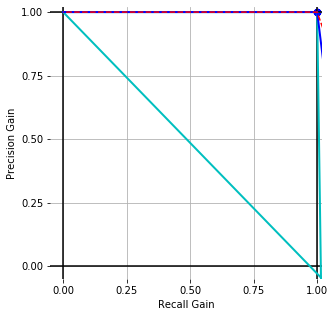

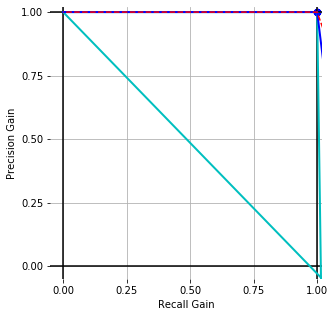

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from prg.prg import create_prg_curve, plot_prg, calc_auprg, plot_pr
plt.rcParams['figure.figsize'] = (6,5)

prg_curve = create_prg_curve(y_true, y_pred)
plot_prg(prg_curve)

Here the blue curve is the PRG curve and the red curve is its convex hull, connecting the Pareto-optimal points. The interpolated red points can be achieved by throwing a biased coin to decide which of the two thresholds is applied.

Additionally, we can calculate the area under the curve:

In [3]:
auprg = calc_auprg(prg_curve)
print("AUPRG =", auprg)


AUPRG = 0.41934514157862357


This area can become negative if the curve is mostly below the x-axis, which corresponds to the performance of a random model.

Behind the scenes, the prg_curve data structure resulting from the create_prg_curve function call is actually a table where each row represents one possible threshold on the scoring classifier and provides the respective precision gain and recall gain:

In [4]:
import pandas # used for pretty printing purposes only
pandas.DataFrame(prg_curve)

,TP,TN,FP,FN,precision,recall,precision_gain,recall_gain,is_crossing,in_unit_square
0,0,-985,995,0,0.000000,0.000000,1.000000e+00,0.000000,1.0,True
1,0,-1080,1090,0,0.000000,0.000000,1.000000e+00,1.000000,0.0,True
2,0,-1060,1070,0,0.000000,0.000000,1.000000e+00,1.000000,0.0,True
3,0,-1030,1040,0,0.000000,0.000000,1.000000e+00,1.000000,0.0,True
4,0,-1000,1010,0,0.000000,0.000000,1.000000e+00,1.000000,0.0,True
5,0,-930,940,0,0.000000,0.000000,1.000000e+00,1.000000,0.0,True
6,0,-910,920,0,0.000000,0.000000,1.000000e+00,1.000000,0.0,True
7,0,-900,910,0,0.000000,0.000000,1.000000e+00,1.000000,0.0,True
8,0,-890,900,0,0.000000,0.000000,1.000000e+00,1.000000,0.0,True
9,16,-1035,1044,-15,0.015094,15.999998,-6.250000e+00,1.104167,0.0,False


Since the prg_curve data structure contains all the necessary information to calculate precision and recall, we can also use it to plot the corresponding PR curve (note that this code currently does not perform non-linear interpolation as required for PR curves).

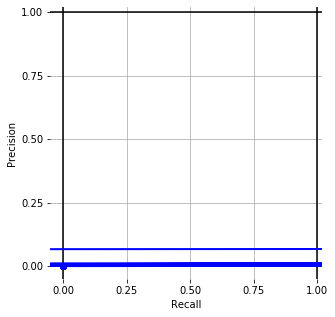

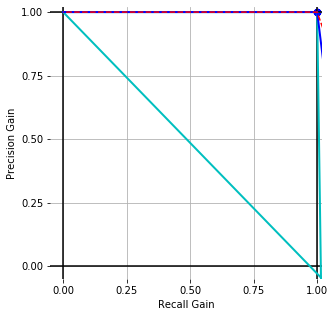

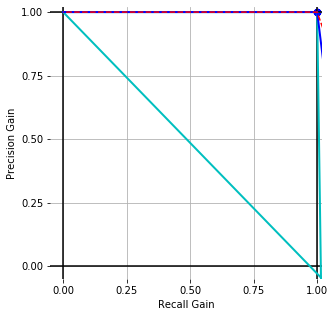

In [5]:
plot_pr(prg_curve)
plot_prg(prg_curve)